In [2]:
# Q1: 
P_pass = 0.9
P_not_pass = 1 - P_pass
P_quick_given_pass = 0.6
P_quick_given_not_pass = 0.3

P_quick = (P_quick_given_pass * P_pass) + (P_quick_given_not_pass * P_not_pass)

P_pass_given_quick = (P_quick_given_pass * P_pass) / P_quick

print(f"The proportion of students who answer quickly and pass the class is: {P_pass_given_quick:.4f}")


The proportion of students who answer quickly and pass the class is: 0.9474


In [3]:
# Q2: 
!pip install sympy ipython

try:
    from sympy import symbols, Eq, latex
    from IPython.display import display, Math
except ImportError as e:
    print("Required libraries are missing. Install them using 'pip install sympy ipython'")
    raise e
  
theta = symbols('theta')  
alpha = symbols('alpha')
x = symbols('x')  

prior = f"Dirichlet({alpha})"  
likelihood = f"Multinomial(n, {theta})" 
posterior = f"Dirichlet({alpha} + {x})"  

print("1. Prior distribution: ", prior)
print("2. Likelihood: ", likelihood)
print("3. Posterior distribution: ", posterior)

from IPython.display import Math

process_latex = (
    r"p(\theta|x, n, \alpha) \propto p(x|\theta, n) \cdot p(\theta|\alpha) \\ "
    r"p(\theta|x, n, \alpha) \sim \text{Dirichlet}(\alpha + x)"
)
display(Math(process_latex))

1. Prior distribution:  Dirichlet(alpha)
2. Likelihood:  Multinomial(n, theta)
3. Posterior distribution:  Dirichlet(alpha + x)


<IPython.core.display.Math object>

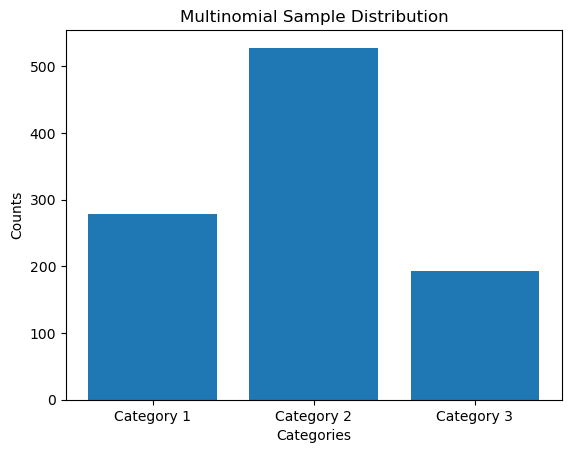

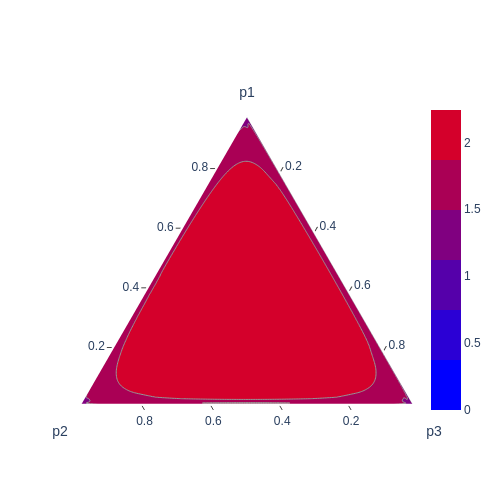

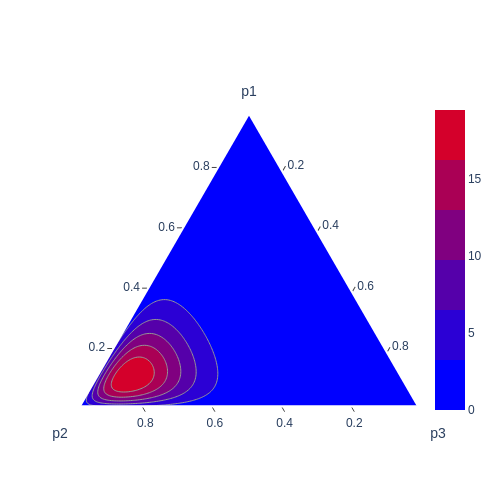

In [4]:
# Q3:
import numpy as np
from scipy.stats import multinomial, dirichlet
import matplotlib.pyplot as plt
from plotly.figure_factory import create_ternary_contour

# Part 1: Multinomial Distribution
n = 10 
p = [0.3, 0.5, 0.2]  
multinomial_dist = multinomial(n, p)

samples = multinomial_dist.rvs(size=100)
categories = np.sum(samples, axis=0)

plt.bar(range(len(categories)), categories)
plt.xticks(range(len(categories)), [f'Category {i+1}' for i in range(len(categories))])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Multinomial Sample Distribution')
plt.savefig("multinomial_distribution.png")
plt.show()

# Part 2: Dirichlet Distribution (Prior and Posterior)
alpha_prior = np.array([1.1, 1.1, 1.1])
dirichlet_prior = dirichlet(alpha_prior)

p1 = np.linspace(0, 1, 100)
p2 = np.linspace(0, 1, 100)
p_ = np.meshgrid(p1, p2)
p1, p2 = p_[0].flatten(), p_[1].flatten()
p3 = 1 - p1 - p2
mask = (p1 >= 0) & (p2 >= 0) & (p3 >= 0)
points = np.vstack([p1[mask], p2[mask], p3[mask]]).T
prior_densities = dirichlet_prior.pdf(points.T)

fig = create_ternary_contour(
    points.T, prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig.show("png")

alpha_posterior = alpha_prior + samples[0] 
dirichlet_posterior = dirichlet(alpha_posterior)
posterior_densities = dirichlet_posterior.pdf(points.T)

fig = create_ternary_contour(
    points.T, posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
)
fig.show("png")
